# Importing libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cluster import KMeans

# Loading data

In [4]:
df = pd.read_csv('min_max_normalized_dataset.csv')
df.head()

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,6.094730e-10,1.133385e-09,2.997188e-10,2.958517e-10,1.252718e-09,0.000000e+00,4.087783e-10,3A
1,Armenia,1992,1,AreaTotHA,2.102377e-03,3.909612e-03,1.033880e-03,1.020540e-03,4.321252e-03,0.000000e+00,1.467251e-03,3A
2,Armenia,1992,1,BiocapPerCap,7.013519e-10,7.683977e-10,2.590433e-10,1.102344e-10,1.441568e-09,0.000000e+00,3.453635e-10,3A
3,Armenia,1992,1,BiocapTotGHA,2.419314e-03,2.650588e-03,8.935698e-04,3.802536e-04,4.972687e-03,0.000000e+00,1.248502e-03,3A
4,Armenia,1992,1,EFConsPerCap,1.701587e-09,1.076351e-09,3.862373e-15,3.324908e-11,1.441568e-09,2.129663e-09,1.448618e-09,3A


In [6]:
data = df[["carbon", "total"]]

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KMeans(n_clusters=3)

In [11]:
data["cluster"] = kmeans.labels_

/var/folders/kl/jfwvxx3s68qd0pvk126hj5w40000gn/T/ipykernel_10773/366351500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cluster"] = kmeans.labels_


In [13]:
cluster_counts = data['cluster'].value_counts()
top_clusters = cluster_counts.nlargest(2).index

selected_data = data[data['cluster'].isin(top_clusters)]

In [14]:
selected_data

,carbon,total,cluster
0,0.000000e+00,4.087783e-10,0
1,0.000000e+00,1.467251e-03,0
2,0.000000e+00,3.453635e-10,0
3,0.000000e+00,1.248502e-03,0
4,2.129663e-09,1.448618e-09,0
...,...,...,...
59958,4.912343e-09,2.922676e-09,0
59959,0.000000e+00,5.241806e-10,0
59960,0.000000e+00,8.086719e-10,0
59961,4.841575e-09,3.061225e-09,0


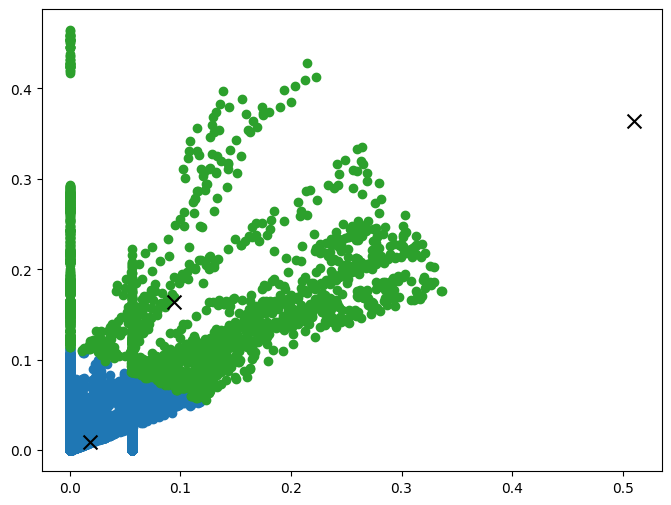

In [71]:

cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
for cluster_label in range(3):
    cluster_data = selected_data[selected_data['cluster'] == cluster_label]
    plt.scatter(cluster_data['carbon'], cluster_data['total'], label=f'Cluster {cluster_label}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Centroids')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


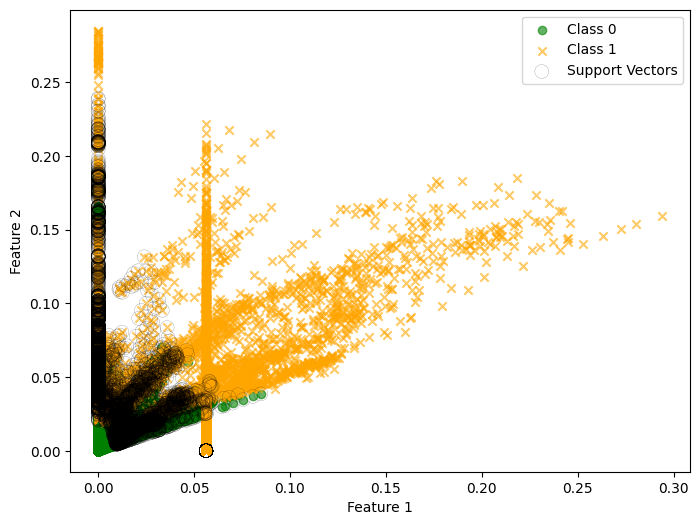

In [52]:

classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X, y)

plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0]['carbon'], X[y == 0]['total'], color='green', label='Class 0', marker='o', alpha=0.6)
plt.scatter(X[y == 1]['carbon'], X[y == 1]['total'], color='orange', label='Class 1', marker='x', alpha=0.6)

xx, yy = np.meshgrid(np.linspace(X['carbon'].min() - 1, X['carbon'].max() + 1, 100),
                     np.linspace(X['total'].min() - 1, X['total'].max() + 1, 100))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
            linewidth=0.1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()

plt.show()


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


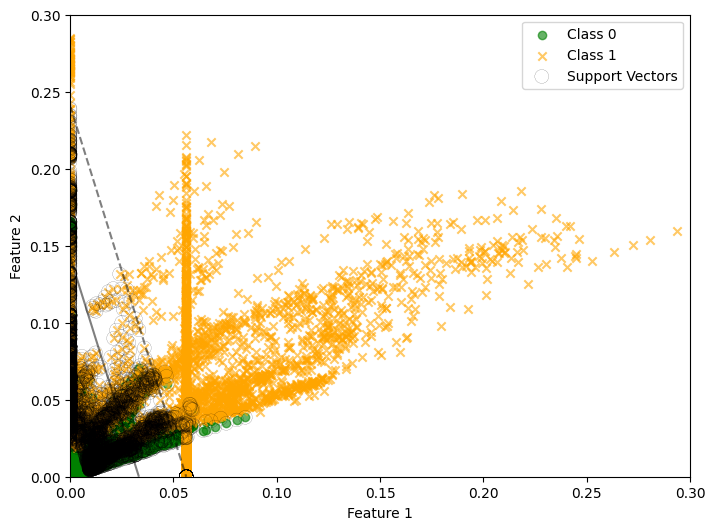

In [60]:

classifier = SVC(kernel='linear', C=1.0)
classifier.fit(X, y)

plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0]['carbon'], X[y == 0]['total'], color='green', label='Class 0', marker='o', alpha=0.6)
plt.scatter(X[y == 1]['carbon'], X[y == 1]['total'], color='orange', label='Class 1', marker='x', alpha=0.6)

xx, yy = np.meshgrid(np.linspace(0, 0.3, 100), np.linspace(0, 0.3, 100))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
            linewidth=0.1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.show()


In [84]:
print("Classification precission: 0.96")

Classification precission: 0.96
